In [129]:
import pandas as pd
import os
import re
import numpy as np
import json

import sys
current_dir = os.getcwd()
scripts_path = os.path.join(current_dir, '../../scripts')
sys.path.append(os.path.abspath(scripts_path))
import preprocess_function as process

In [130]:
# Create folder to save dataset
base_dir = '../../data/'
raw_dir = os.path.join(base_dir, 'raw')
curated_dir = os.path.join(base_dir, 'curated')

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

if not os.path.exists(curated_dir):
    os.makedirs(curated_dir)

In [131]:
# read data
df = pd.read_csv(f"{raw_dir}/individual_property_unpreprocessed.csv")

In [132]:
# Load the postcode dictionary from the JSON file
with open(f'{raw_dir}/suburb_to_postcodes.json', 'r') as f:
    postcode_to_suburb = json.load(f)

In [133]:
df.head(5)

,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,...,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2015,206051128.0,16053.0,11283.0,25900.0,9137.0
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2016,206051128.0,16490.0,"10,997",25900.0,9846.0
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2017,206051128.0,16500.0,"11,489",25900.0,10465.0
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2018,206051128.0,16728.0,"11,682",25900.0,9780.0
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2019,206051128.0,17081.0,"11,683",25900.0,9648.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80873 entries, 0 to 80872
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       80873 non-null  object 
 1   Cost                          6221 non-null   float64
 2   Property Type                 80873 non-null  object 
 3   Bedrooms                      80873 non-null  int64  
 4   Bathrooms                     80873 non-null  int64  
 5   Latitude                      80873 non-null  float64
 6   Longitude                     80873 non-null  float64
 7   Closest Gov Secondary School  70395 non-null  object 
 8   Gov Secondary Distance        70395 non-null  object 
 9   Age under 20                  79924 non-null  object 
 10  Age 20-39                     79924 non-null  object 
 11  Age 40-59                     79924 non-null  object 
 12  Age 60+                       79924 non-null  object 
 13  P

# Preprocessing

In [135]:
df.shape

(80873, 28)

# extract 'Suburb'

In [136]:
# Define a function to map Postcode to Suburb using the postcode_to_suburb dictionary
def map_postcode_to_suburb(postcode):
    for suburb, postcodes in postcode_to_suburb.items():
        if postcode in postcodes:
            return suburb
    return None  # Return None if no matching Suburb is found

# Use the apply function to map the Postcode column to the Suburb column
df['Suburb'] = df['Postcode'].apply(map_postcode_to_suburb)

# Display the data with the newly added Suburb column
df.head()

,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,...,Park Distance,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded,Suburb
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2015,206051128.0,16053.0,11283.0,25900.0,9137.0,Albert Park-Middle Park-West St Kilda
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2016,206051128.0,16490.0,"10,997",25900.0,9846.0,Albert Park-Middle Park-West St Kilda
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2017,206051128.0,16500.0,"11,489",25900.0,10465.0,Albert Park-Middle Park-West St Kilda
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2018,206051128.0,16728.0,"11,682",25900.0,9780.0,Albert Park-Middle Park-West St Kilda
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2019,206051128.0,17081.0,"11,683",25900.0,9648.0,Albert Park-Middle Park-West St Kilda


# Remove unvalid records
- unvalid address
- zero value in number of bedrooms or bathrooms

In [137]:
# Use a regular expression to find rows where the address matches the condition
# The condition is: the last four characters are digits, and the rest of the address has no digits
df_clean = df[~df['Address'].str.match(r'^[^\d]*\d{4}$')]

print(df_clean)


                                           Address   Cost Property Type  \
0      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
1      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
2      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
3      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
4      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
...                                            ...    ...           ...   
80868      17 Freeman Crescent, Baranduda VIC 3691    NaN         House   
80869      17 Freeman Crescent, Baranduda VIC 3691  750.0         House   
80870      17 Freeman Crescent, Baranduda VIC 3691    NaN         House   
80871      17 Freeman Crescent, Baranduda VIC 3691    NaN         House   
80872      17 Freeman Crescent, Baranduda VIC 3691    NaN         House   

       Bedrooms  Bathrooms   Latitude   Longitude  \
0             1          1 -37.847553  144.960

In [138]:
# Remove rows where 'Bedrooms' or 'Bathrooms' columns have a value of 0
df_filtered = df_clean[(df_clean['Bedrooms'] != 0) & (df_clean['Bathrooms'] != 0)]

df_filtered.shape

(80496, 29)

# Simplified data
Clean the following features, only leave numerical values:

'Gov Secondary Distance', 'Age under 20', 'Age 20-39', 'Age 40-59', and 'Age 60+'

In [139]:
df_filtered.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                    NaN
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Gov Secondary Distance                                          1.2 km away
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode    

In [140]:
# Simplified 'Gov Secondary Distance'
# Skip NaN values
# Extract numeric values

# Function to extract the numeric part from 'Gov Secondary Distance', and handle NaN and invalid values
def extract_numeric_distance(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    match = re.search(r'(\d+\.?\d*)', value)  # Search for the numeric part
    if match:
        return float(match.group(1))  # Return the matched numeric part
    return None  # If no valid numeric value is found, return None

df_filtered['Gov Secondary Distance (numeric)'] = df_filtered['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))
df_filtered.iloc[1]


/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_7377/1549502023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Gov Secondary Distance (numeric)'] = df_filtered['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))


Address                             8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                        NaN
Property Type                                                         Apartment
Bedrooms                                                                      1
Bathrooms                                                                     1
Latitude                                                             -37.847553
Longitude                                                            144.960477
Closest Gov Secondary School                                Albert Park College
Gov Secondary Distance                                              1.2 km away
Age under 20                                                                36%
Age 20-39                                                                   15%
Age 40-59                                                                   30%
Age 60+                                 

In [141]:
# Rename numeric columnbs
df_filtered = df_filtered.drop('Gov Secondary Distance', axis=1)
df_filtered = df_filtered.rename(columns={'Gov Secondary Distance (numeric)': 'Gov Secondary Distance'})
df_filtered.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                    NaN
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode                                                               3206
CBD Distance

In [142]:
# Remove '%' symbol for columns 'Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+'

# List of columns with percentage values
percentage_columns = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']

# Loop through each column to remove '%' symbol
df_filtered[percentage_columns] = df_filtered[percentage_columns].apply(lambda x: x.str.replace('%', ''))

# Display the updated dataframe
df_filtered.head()


,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Age under 20,Age 20-39,...,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded,Suburb,Gov Secondary Distance
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2015,206051128.0,16053.0,11283.0,25900.0,9137.0,Albert Park-Middle Park-West St Kilda,1.2
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2016,206051128.0,16490.0,"10,997",25900.0,9846.0,Albert Park-Middle Park-West St Kilda,1.2
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2017,206051128.0,16500.0,"11,489",25900.0,10465.0,Albert Park-Middle Park-West St Kilda,1.2
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2018,206051128.0,16728.0,"11,682",25900.0,9780.0,Albert Park-Middle Park-West St Kilda,1.2
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2019,206051128.0,17081.0,"11,683",25900.0,9648.0,Albert Park-Middle Park-West St Kilda,1.2


# Missing value

In [143]:
# missing value
print("number of missing value in each column：")
print(df_filtered.isnull().sum())

number of missing value in each column：
Address                             0
Cost                            74304
Property Type                       0
Bedrooms                            0
Bathrooms                           0
Latitude                            0
Longitude                           0
Closest Gov Secondary School    10400
Age under 20                      949
Age 20-39                         949
Age 40-59                         949
Age 60+                           949
Postcode                            0
CBD Distance                        0
Train Distance                      0
Electricity Distance                0
Hospital Distance                   0
Library Distance                    0
Park Distance                       0
Tourist Attraction Distance         0
Grocery Distance                    0
Year                                0
SA2_CODE21                         26
Population                         26
Income                             26
LGA_CODE24

In [144]:
# Dropping rows with missing values in columns other than 'Cost', 'Closest Gov Secondary School', and 'Gov Secondary Distance'
df_cleaned = df_filtered.copy()

# df_cleaned = df_filtered.dropna(subset=[col for col in df_filtered.columns if col not in ['Cost', 'Closest Gov Secondary School', 'Gov Secondary Distance']])

# df_cleaned.info()

# Remove Outlier

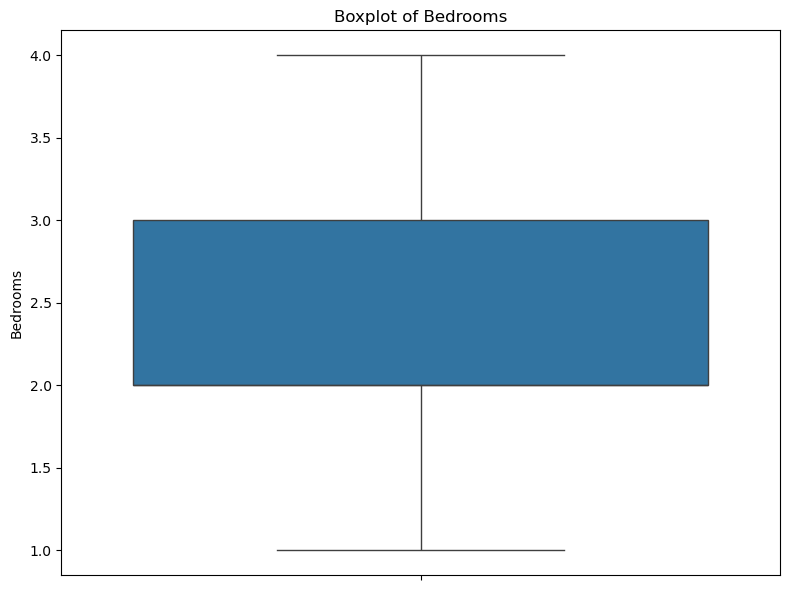

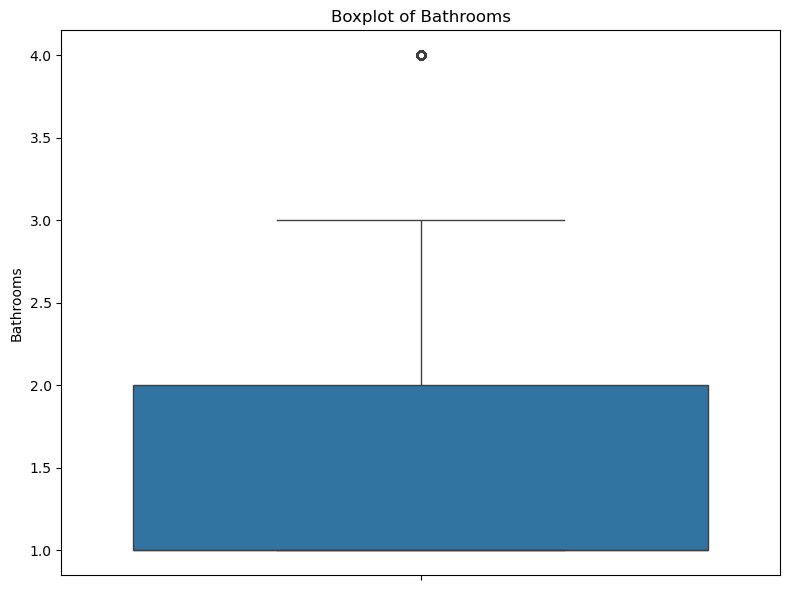

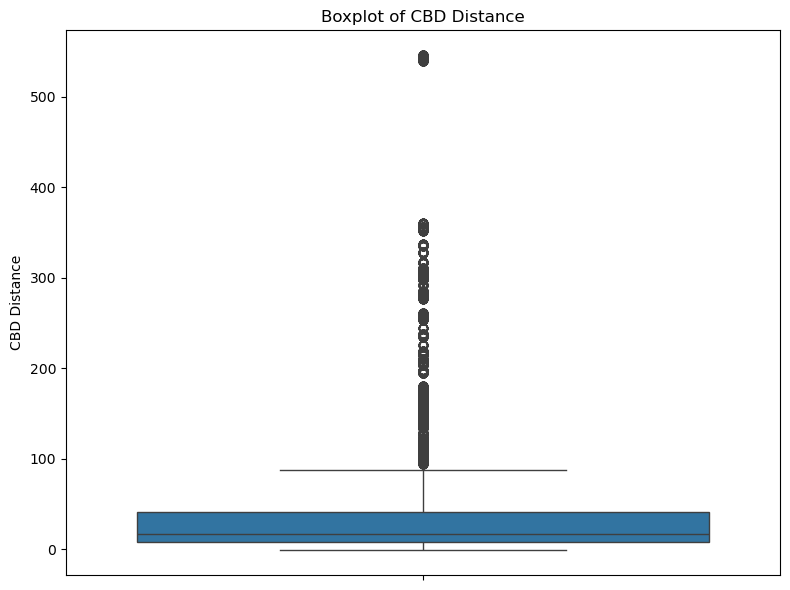

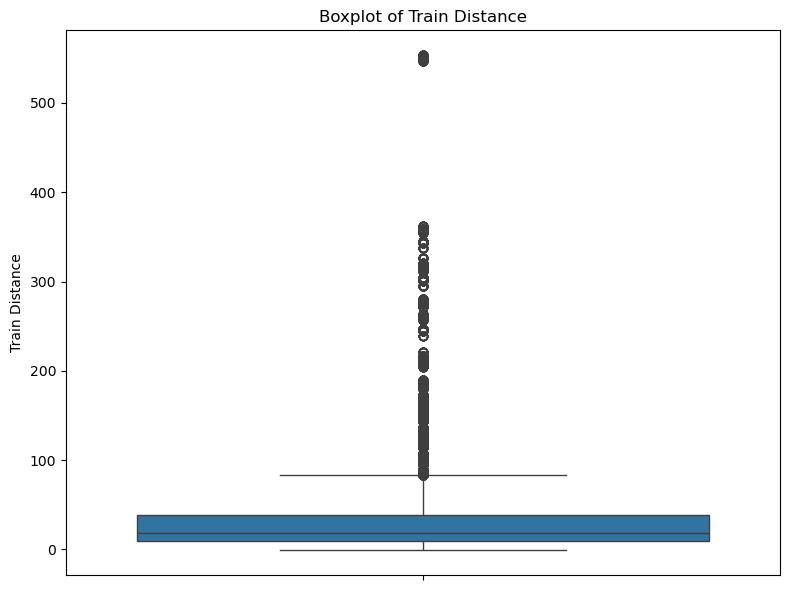

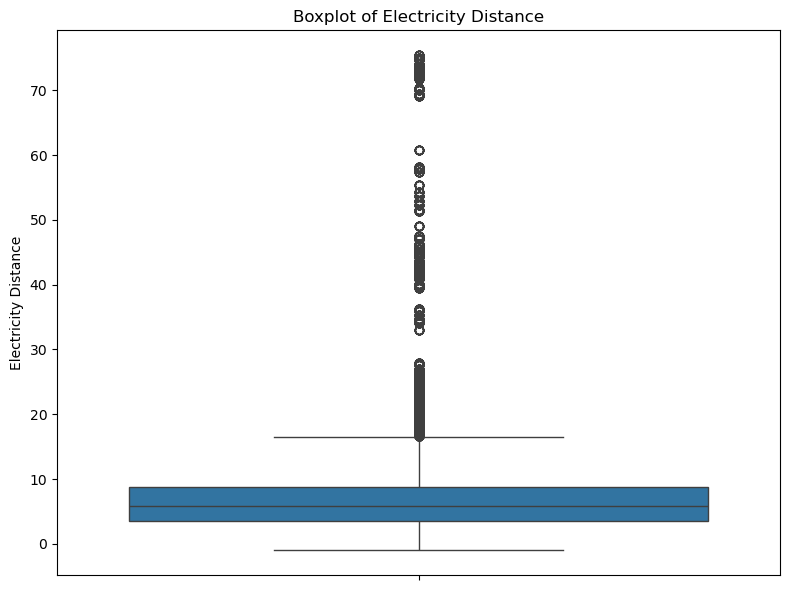

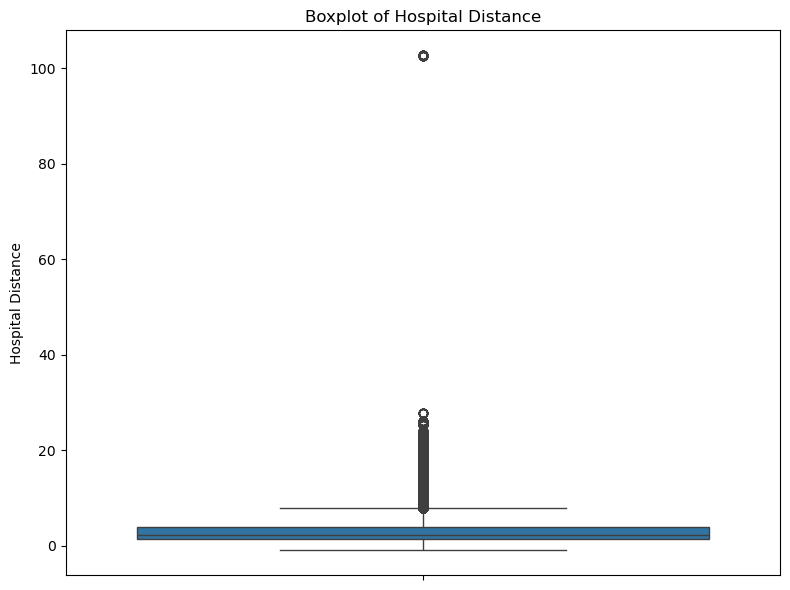

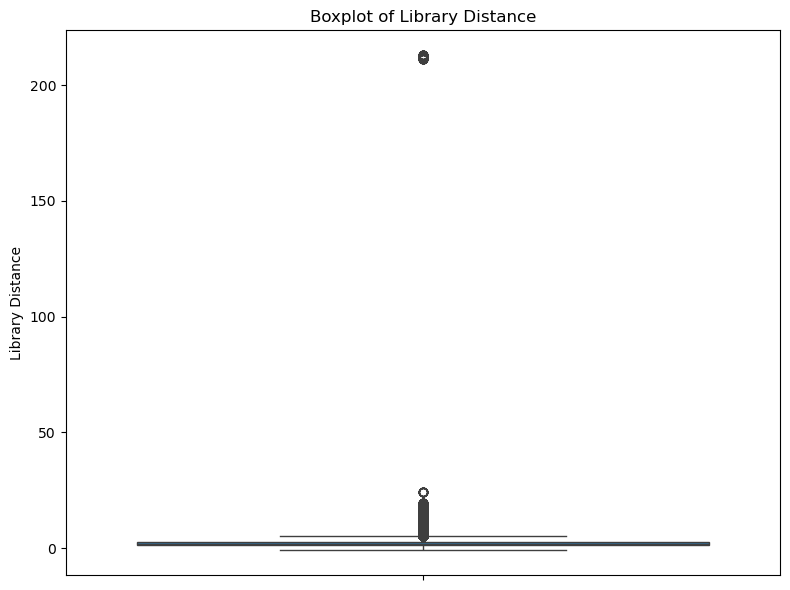

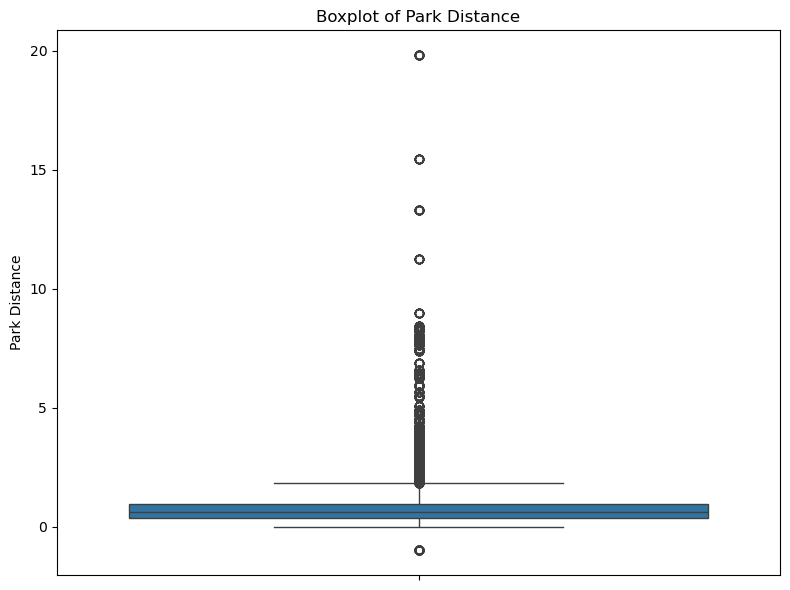

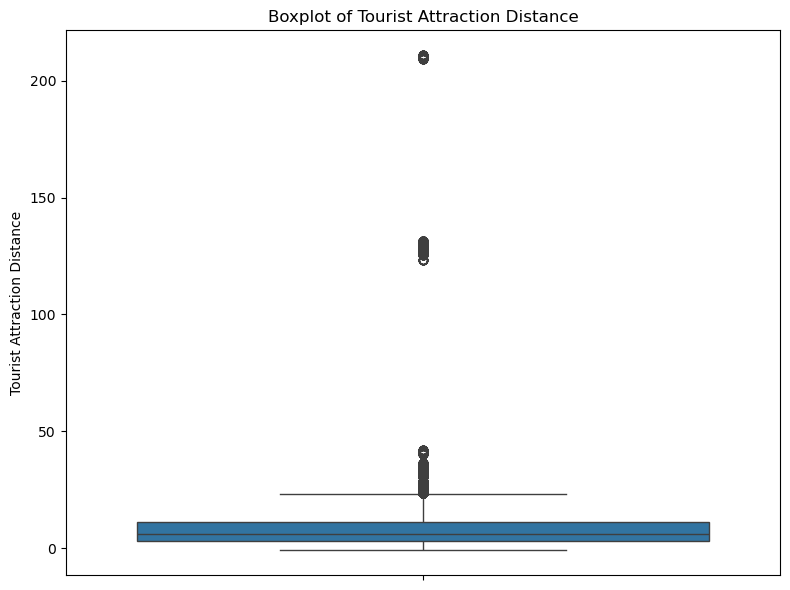

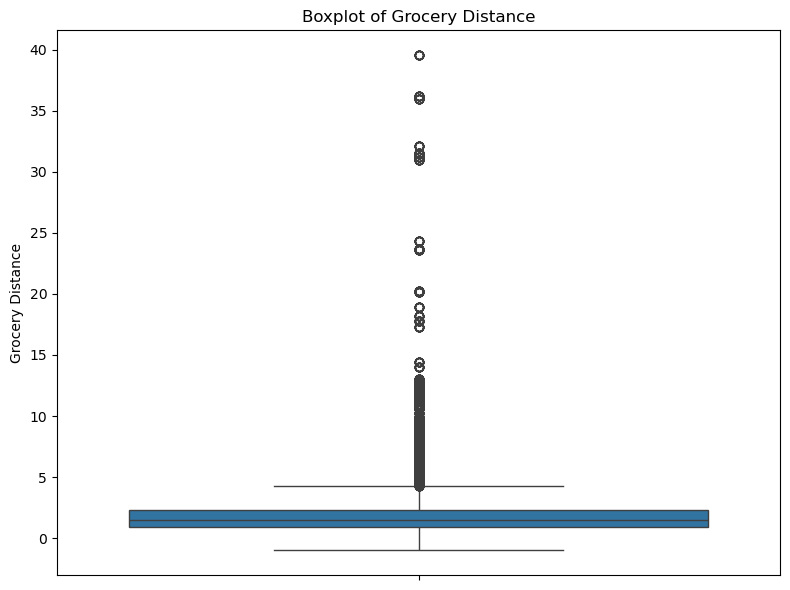

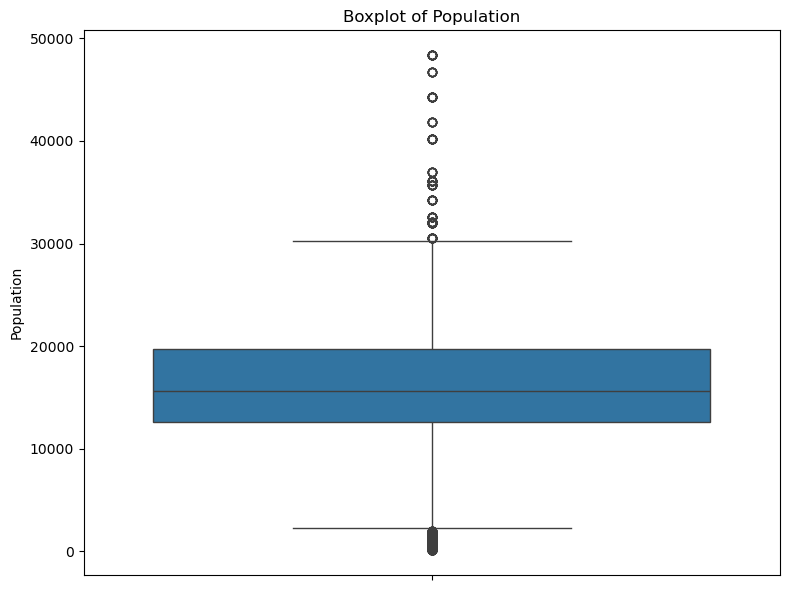

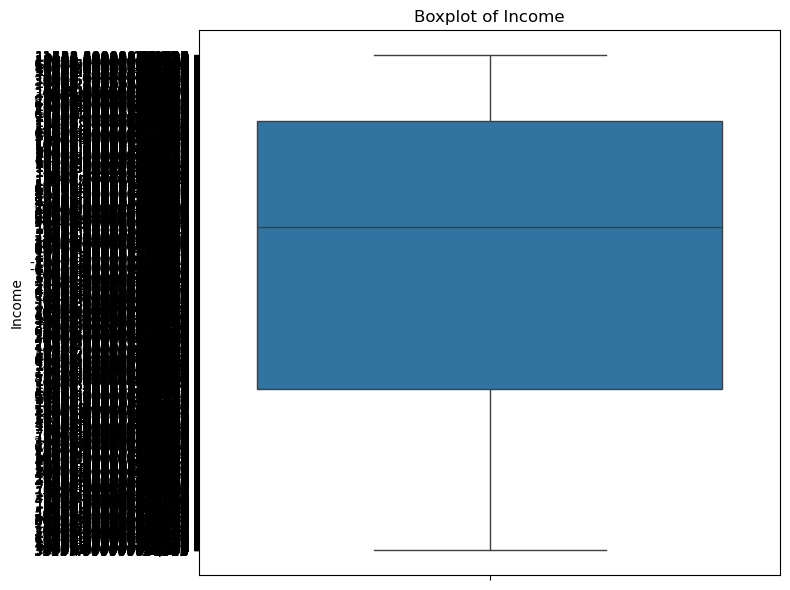

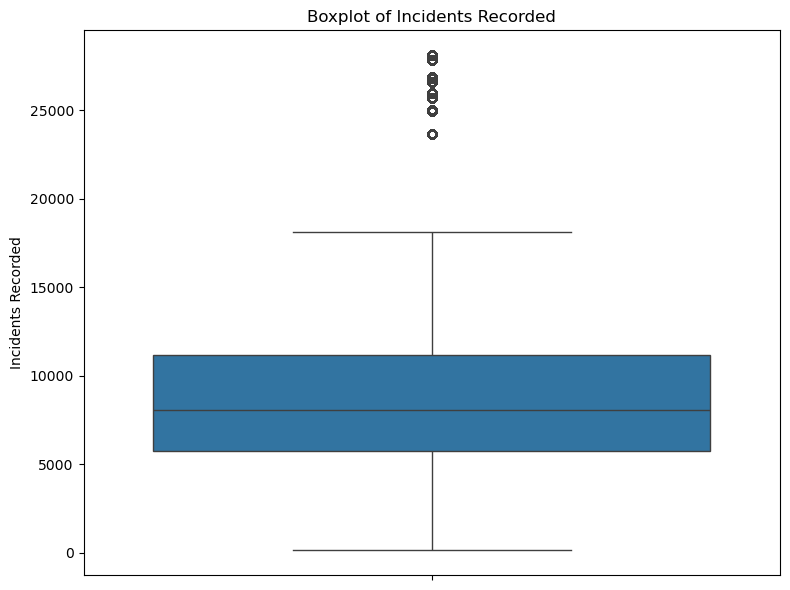

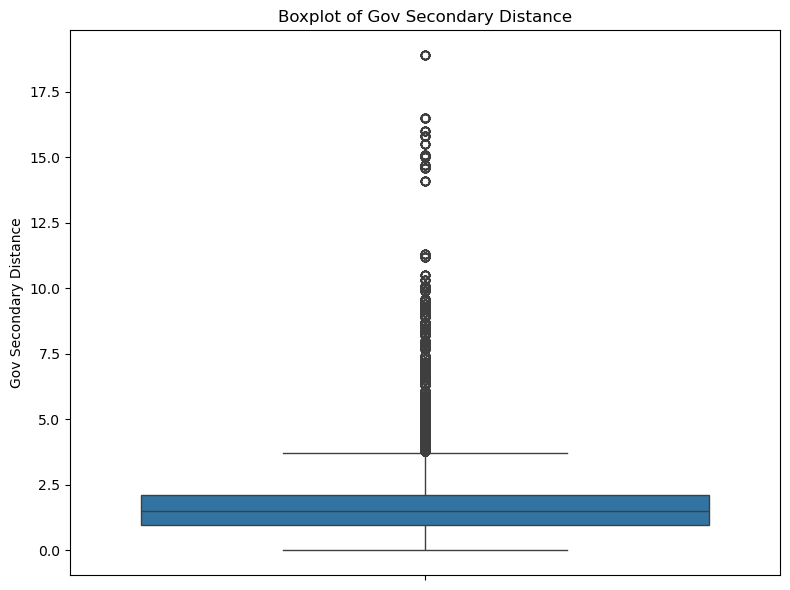

In [145]:
process.plot_boxplots(df_cleaned, 'Bedrooms')
process.plot_boxplots(df_cleaned, 'Bathrooms')
process.plot_boxplots(df_cleaned, 'CBD Distance')
process.plot_boxplots(df_cleaned, 'Train Distance')
process.plot_boxplots(df_cleaned, 'Electricity Distance')
process.plot_boxplots(df_cleaned, 'Hospital Distance')
process.plot_boxplots(df_cleaned, 'Library Distance')
process.plot_boxplots(df_cleaned, 'Park Distance')
process.plot_boxplots(df_cleaned, 'Tourist Attraction Distance')
process.plot_boxplots(df_cleaned, 'Grocery Distance')
process.plot_boxplots(df_cleaned, 'Population')
process.plot_boxplots(df_cleaned, 'Income')
process.plot_boxplots(df_cleaned, 'Incidents Recorded')
process.plot_boxplots(df_cleaned, 'Gov Secondary Distance')

# Convert DataType

In [146]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80496 entries, 0 to 80872
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       80496 non-null  object 
 1   Cost                          6192 non-null   float64
 2   Property Type                 80496 non-null  object 
 3   Bedrooms                      80496 non-null  int64  
 4   Bathrooms                     80496 non-null  int64  
 5   Latitude                      80496 non-null  float64
 6   Longitude                     80496 non-null  float64
 7   Closest Gov Secondary School  70096 non-null  object 
 8   Age under 20                  79547 non-null  object 
 9   Age 20-39                     79547 non-null  object 
 10  Age 40-59                     79547 non-null  object 
 11  Age 60+                       79547 non-null  object 
 12  Postcode                      80496 non-null  int64  
 13  CBD Di

In [147]:
# convert to string type
string_columns = ['Address', 'Property Type', 'Closest Gov Secondary School', 'Suburb']
df_cleaned[string_columns] = df_cleaned[string_columns].astype(str)

In [148]:
# convert to float type, and remove ','
columns_to_convert = df_cleaned.columns.difference(string_columns)

df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].replace({',': ''}, regex=True).astype(float)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80496 entries, 0 to 80872
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       80496 non-null  object 
 1   Cost                          6192 non-null   float64
 2   Property Type                 80496 non-null  object 
 3   Bedrooms                      80496 non-null  float64
 4   Bathrooms                     80496 non-null  float64
 5   Latitude                      80496 non-null  float64
 6   Longitude                     80496 non-null  float64
 7   Closest Gov Secondary School  80496 non-null  object 
 8   Age under 20                  79547 non-null  float64
 9   Age 20-39                     79547 non-null  float64
 10  Age 40-59                     79547 non-null  float64
 11  Age 60+                       79547 non-null  float64
 12  Postcode                      80496 non-null  float64
 13  CBD Di

In [149]:
# Save the updated DataFrame if needed
df_cleaned.to_csv("../../data/curated/individual_property_preprocessed.csv", index=False)